<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Helium_Mobius_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ζ=1.50  E=-3.307495 a.u.
ζ=1.62  E=-3.056691 a.u.
ζ=1.75  E=-2.753537 a.u.
ζ=1.88  E=-2.395991 a.u.
ζ=2.00  E=-1.981333 a.u.
ζ=2.12  E=-1.506316 a.u.
ζ=2.25  E=-0.967329 a.u.
ζ=2.38  E=-0.360568 a.u.
ζ=2.50  E=0.317793 a.u.


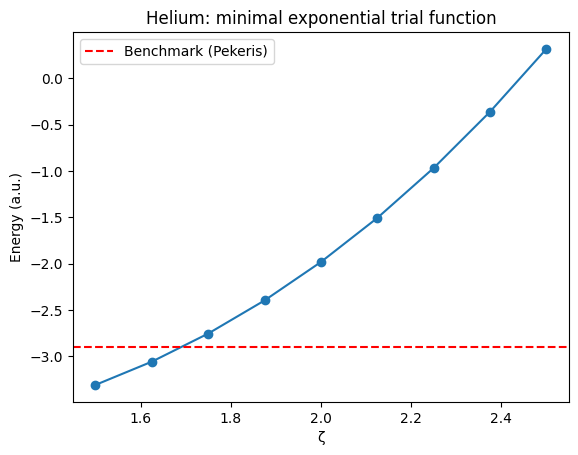


Minimum ≈ -3.307495 a.u.
Analytic optimum: zeta* = 1.687500,  E* = -2.847656 a.u.


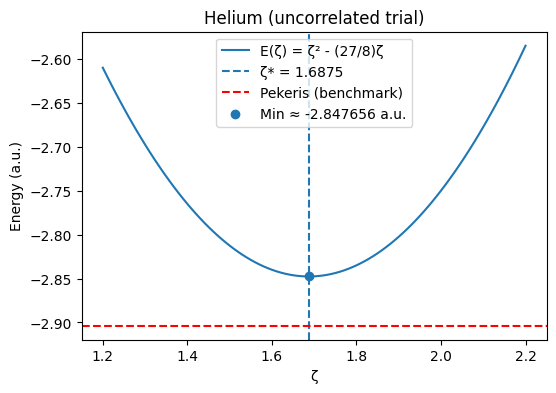

ζ=1.300  E_num=-2.098721  E_analytic=-2.697500
ζ=1.350  E_num=-2.061057  E_analytic=-2.733750
ζ=1.400  E_num=-2.018305  E_analytic=-2.765000
ζ=1.450  E_num=-1.970470  E_analytic=-2.791250
ζ=1.500  E_num=-1.917559  E_analytic=-2.812500
ζ=1.550  E_num=-1.859576  E_analytic=-2.828750
ζ=1.600  E_num=-1.796526  E_analytic=-2.840000
ζ=1.650  E_num=-1.728413  E_analytic=-2.846250
ζ=1.700  E_num=-1.655242  E_analytic=-2.847500
ζ=1.750  E_num=-1.577016  E_analytic=-2.843750
ζ=1.800  E_num=-1.493738  E_analytic=-2.835000
ζ=1.850  E_num=-1.405412  E_analytic=-2.821250
ζ=1.900  E_num=-1.312040  E_analytic=-2.802500
ζ=1.950  E_num=-1.213625  E_analytic=-2.778750
ζ=2.000  E_num=-1.110169  E_analytic=-2.750000
ζ=2.050  E_num=-1.001675  E_analytic=-2.716250
ζ=2.100  E_num=-0.888145  E_analytic=-2.677500


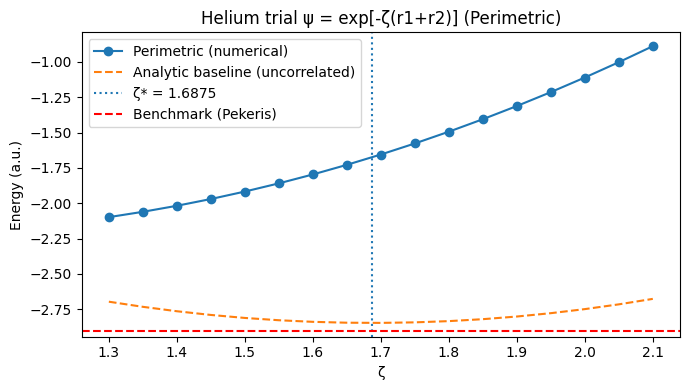


Analytic optimum: ζ* = 1.687500,  E* = -2.847656 a.u.
Numerical min (grid): -2.098721 a.u. at ζ ≈ 1.300


In [ ]:
import numpy as np
from numpy.polynomial.laguerre import laggauss
import matplotlib.pyplot as plt

Z=2.0

def gauss_laguerre(n,scale=1.0):
    x,w=laggauss(n)
    return x/scale, w/scale

def trial_phi(r1,r2,r12,zeta):
    return np.exp(-zeta*(r1+r2))

def build_SH_trial(zeta,ngrid=40):
    r1,w1=gauss_laguerre(ngrid)
    r2,w2=gauss_laguerre(ngrid)
    r12,w12=gauss_laguerre(ngrid)
    S=0.0; H=0.0
    for a,ra in enumerate(r1):
        for b,rb in enumerate(r2):
            for c,rc in enumerate(r12):
                if rc<abs(ra-rb) or rc>(ra+rb): continue
                J=8*np.pi**2*ra*rb*rc
                wt=w1[a]*w2[b]*w12[c]*J
                phi=trial_phi(ra,rb,rc,zeta)
                # Overlap
                S+=wt*phi*phi
                # Potential
                V=-Z/(ra+1e-12)-Z/(rb+1e-12)+1.0/(rc+1e-12)
                H+=wt*phi*phi*V
                # Kinetic: ∇²φ = ( (ζ² - 2ζ/r1) + (ζ² - 2ζ/r2) ) φ
                lap = ((zeta**2 - 2*zeta/(ra+1e-12)) + (zeta**2 - 2*zeta/(rb+1e-12)) )*phi
                H+=wt*(-0.5)*phi*lap
    return H/S

# Scan zeta
zlist=np.linspace(1.5,2.5,9)
Evals=[]
for z in zlist:
    E=build_SH_trial(z,ngrid=35)
    Evals.append(E)
    print(f"ζ={z:.2f}  E={E:.6f} a.u.")

plt.plot(zlist,Evals,"-o")
plt.axhline(-2.903724,linestyle="--",color="r",label="Benchmark (Pekeris)")
plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)")
plt.title("Helium: minimal exponential trial function")
plt.legend(); plt.show()

print(f"\nMinimum ≈ {min(Evals):.6f} a.u.")

import numpy as np
import matplotlib.pyplot as plt

def E_analytic(z):
    return z*z - (27.0/8.0)*z

z = np.linspace(1.2, 2.2, 101)
Ea = E_analytic(z)
z_opt = 27.0/16.0
E_opt = E_analytic(z_opt)

print(f"Analytic optimum: zeta* = {z_opt:.6f},  E* = {E_opt:.6f} a.u.")

plt.figure(figsize=(6,4))
plt.plot(z, Ea, label="E(ζ) = ζ² - (27/8)ζ")
plt.axvline(z_opt, ls="--", label=f"ζ* = {z_opt:.4f}")
plt.axhline(-2.903724, ls="--", c="r", label="Pekeris (benchmark)")
plt.scatter([z_opt], [E_opt], zorder=5, label=f"Min ≈ {E_opt:.6f} a.u.")
plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)"); plt.title("Helium (uncorrelated trial)")
plt.legend(); plt.show()

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.laguerre import laggauss

Z = 2.0  # helium

# Perimetric coords: u,v,w ≥ 0
# r1=(v+w)/2, r2=(u+w)/2, r12=(u+v)/2
def r_vars(u,v,w):
    r1 = 0.5*(v+w)
    r2 = 0.5*(u+w)
    r12= 0.5*(u+v)
    return r1,r2,r12

# Jacobian after angular reduction (constant prefactors cancel in V/S)
# We'll use J(u,v,w) ∝ (u+v)(v+w)(w+u); the overall constant cancels in the ratio.
def J_per(u,v,w):
    return 0.125 * u*v*w*(u+v)*(v+w)*(w+u)


def gauss_laguerre(n, scale=1.0):
    x,w = laggauss(n)
    return x/scale, w/scale

def EV_perimetric(zeta, n=60, scales=(1.0,1.0,1.0)):
    u,wu = gauss_laguerre(n, scales[0])
    v,wv = gauss_laguerre(n, scales[1])
    w,ww = gauss_laguerre(n, scales[2])
    S = 0.0
    V = 0.0
    for a,ua in enumerate(u):
        for b,vb in enumerate(v):
            for c,wc in enumerate(w):
                r1,r2,r12 = r_vars(ua,vb,wc)
                # guard positive triangle automatically satisfied by perimetrics
                psi2 = np.exp(-2*zeta*(r1+r2))
                J = J_per(ua,vb,wc)
                wt = wu[a]*wv[b]*ww[c]*J
                S += wt*psi2
                Vee = 1.0/max(r12,1e-14)
                Vn  = -Z/max(r1,1e-14) - Z/max(r2,1e-14)
                V  += wt*psi2*(Vn + Vee)
    # Energy: E = ζ^2 + V/S
    return zeta*zeta + V/S

# Scan zeta and compare to analytic baseline E(ζ) = ζ² - (27/8)ζ
def E_analytic(z): return z*z - (27.0/8.0)*z

zlist = np.linspace(1.3, 2.1, 17)
E_num = []
E_ana = []
for z in zlist:
    En = EV_perimetric(z, n=50, scales=(1.0,1.0,1.0))
    E_num.append(En)
    E_ana.append(E_analytic(z))
    print(f"ζ={z:.3f}  E_num={En:.6f}  E_analytic={E_analytic(z):.6f}")

z_opt = 27.0/16.0
E_opt = E_analytic(z_opt)

plt.figure(figsize=(7,4))
plt.plot(zlist, E_num, "-o", label="Perimetric (numerical)")
plt.plot(zlist, E_ana, "--", label="Analytic baseline (uncorrelated)")
plt.axvline(z_opt, ls=":", label=f"ζ* = {z_opt:.4f}")
plt.axhline(-2.903724, ls="--", c="r", label="Benchmark (Pekeris)")
plt.xlabel("ζ"); plt.ylabel("Energy (a.u.)"); plt.title("Helium trial ψ = exp[-ζ(r1+r2)] (Perimetric)")
plt.legend(); plt.tight_layout(); plt.show()

print(f"\nAnalytic optimum: ζ* = {z_opt:.6f},  E* = {E_opt:.6f} a.u.")
print(f"Numerical min (grid): {np.min(E_num):.6f} a.u. at ζ ≈ {zlist[int(np.argmin(E_num))]:.3f}")
